# Исследовательский анализ рынка общепита Москвы
* Автор: Кокорин Максим
* Дата: 18.07.2025

## Цели и задачи проекта

Выяснить, какой тип заведения общественного питания и с какими ценами лучше всего открыть в Москве.

Задачи:
* предобработать данные;
* выяснить, какой тип заведения преобладает в Москве;
* узнать, как заведения распределены по округам;
* проверить, какие заведения актуальны для Центрального округа;
* узнать, каких заведений больше – сетевых или несетевых в разрезе каждого типа;
* определить диапазон числа посадочных мест в заведениях;
* узнать среднее число мест для каждого типа заведения;
* посмотреть на средний рейтинг каждого из типов заведений;
* проверить зависимость переменных друг от друга;
* найти топ-15 популярных сетевых заведений Москвы;
* сравнить средний чек в разных округах;
* изучить распределение уровня цен в разных округах;


## Содержимое проекта
* Загрузка данных и знакомство с ними
* Предобработка данных
* Исследовательский анализ данных
* Итоговый вывод и рекомендации

### Загрузка данных и знакомство с ними

In [1]:
# Установим библиотеку phik
!pip install phik


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Импортируем нужные для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

In [3]:
# Сохраним два датафрейма в переменные с названиями rest_info и rest_price
rest_info = pd.read_csv('...')
rest_price = pd.read_csv('...')

In [4]:
# Выведем информацию о первом датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датафрейм rest_info содержит 8406 строк и 9 столбцов. В нём содержится информация о заведениях общественного питания Москвы:
* `id` — идентификатор заведения;
* `name` — название заведения;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым:
0 — заведение не является сетевым;
1 — заведение является сетевым.
* `seats` — количество посадочных мест.

Пропуски есть в столбцах `hours`, `seats`.

In [5]:
# Посмотрим на первые 5 строк датафрейма
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Названия столбцов соответствуют описанию и записаны в едином стиле. Можно уменьшить разряд типа данных в столбцах `rating`, `chain`, `seats`.

In [6]:
# Выведем информацию о втором датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датафрейм rest_price содержит 4058 строк и 5 столбцов. В нём содержится информация о среднем чеке в заведениях общественного питания:
* `id` — идентификатор заведения;
* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

Пропуски есть в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.

In [7]:
# Посмотрим на первые пять строк датафрейма
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Названия столбцов соответствуют описанию и записаны в едином стиле snake_case. Можно уменьшить разряд типов данных в столбцах `middle_avg_bill`, `middle_coffee_cup`.

In [8]:
# Для дальнейшей работы объединим датафреймы rest_info и rest_price и сохраним в rest_join
rest_join = rest_info.merge(rest_price, how='left', on='id')
rest_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


### Предобработка данных

In [9]:
# Уменьшим разряд вещественных чисел, содержащихся в 4 столбцах 
for column in ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    rest_join[column] = pd.to_numeric(rest_join[column], downcast='float')

# Уменьшим разряд целого числа в столбце chain
rest_join['chain'] = pd.to_numeric(rest_join['chain'], downcast='integer')
# Проверим результат
rest_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 665.1+ KB


За счёт изменения типа данных пяти столбцов с `float64` на `float32` и `int64` на `int8` размер датафрейма уменьшился с 412 КБ до 321 КБ.

In [10]:
# Узнаем абсолютное число пропусков (столбец sum) и относительное число пропусков (столбец mean)
rest_join.isna().agg(['sum', 'mean']).transpose()

,sum,mean
id,0.0,0.000000
name,0.0,0.000000
category,0.0,0.000000
address,0.0,0.000000
district,0.0,0.000000
hours,536.0,0.063764
rating,0.0,0.000000
chain,0.0,0.000000
seats,3611.0,0.429574
price,5091.0,0.605639


8 пропущенных значений есть в столбце `hours`, что составляет менее 1% от общего числа строк, поэтому их можно оставить.

37% пропусков есть в поле `seats`. Возможно, они связаны с техническими ошибками, так как количество мест, равное нулю, в датафрейме есть, и в заведениях с пропусками посадочные места есть (это можно проверить в Яндекс Картах). Их можно заменить значением-индикатором -1.

18% пропусков есть в столбце `price`. Причины пропусков так же неизвестны, можно заменить значением "не указано".

Около 6% пропусков есть в столбце avg_bill. Можно заменить на "не указано".

В столбцах `middle_avg_bill` и `middle_coffee_cup` 22% и 86% пропусков соответственно, которые связаны со значением столбца `avg_bill`, поэтому пропуски в них естественны.

In [11]:
# Заменим пропуски в трёх столбцах на значения-индикаторы
rest_join['seats'] = rest_join['seats'].fillna(-1)
rest_join['price'] = rest_join['price'].fillna("Не указано")
rest_join['avg_bill'] = rest_join['avg_bill'].fillna("Не указано")
# Проверим результат
rest_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              8406 non-null   float32
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 665.1+ KB


In [12]:
# Проверим наличие явных дубликатов в датафрейме
rest_join.duplicated().sum()

0

В датафрейме явные дубликаты отсутствуют

In [13]:
# Нормализуем данные столбца name, приведя их к строчному регистру
rest_join['name'] = rest_join['name'].str.lower()
# Проверим наличие дубликатов в столбце name
rest_join.duplicated(subset='name').sum()

2894

Найдено 1121 повторяющихся значений. Однако повторы допустимы, если заведение является сетевым, поэтому посмотрим на повторяющиеся названия несетевых заведений.

In [14]:
# Выведем заведения, названия которых повторяются и которые не считаются сетевыми
rest_join[rest_join.duplicated(subset='name') & (rest_join['chain'] == 0)].sort_values(by='name')

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
6371,8a042f26c657475b93bcef2ff8b13b08,bb grill,"бар,паб","Москва, Автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–23:00",4.4,0,455.0,выше среднего,Средний счёт:1700 ₽,1700.0,NaN
7365,858fa55a27194c4e94aa55d349270b4d,burger club,ресторан,"Москва, улица Борисовские Пруды, 26",Южный административный округ,"ежедневно, 10:00–22:00",4.3,0,5.0,Не указано,Средний счёт:250–500 ₽,375.0,NaN
3405,ab867fa5787a4241aeeefb4520efd696,carrots and beans,кофейня,"Москва, Малая Грузинская улица, 38",Центральный административный округ,"ежедневно, 08:00–21:00",4.4,0,25.0,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
6935,7480fea08f8647e2be961d2e094738bf,coffee point,кафе,"Москва, Научный проезд, 8, стр. 1",Юго-Западный административный округ,пн-пт 08:00–19:00,4.2,0,-1.0,низкие,Средний счёт:50–250 ₽,150.0,NaN
8230,ccc1481446184feaab166883961f810d,di villaggio,кафе,"Москва, парк Тюфелева роща",Южный административный округ,"ежедневно, 12:00–21:00",3.3,0,-1.0,Не указано,Не указано,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,798fa68060cf42c8bbcf5f5ec62dda9c,шашлычная,кафе,"Москва, улица Вавилова, 5, стр. 6",Южный административный округ,"ежедневно, 10:00–22:00",4.3,0,-1.0,средние,Средний счёт:300–600 ₽,450.0,NaN
5982,e788e6aa7d8743d4ac7d4e88cc522e13,шашлычная,"бар,паб","Москва, Новочерёмушкинская улица, 12",Юго-Западный административный округ,"ежедневно, 11:00–23:00",4.3,0,30.0,средние,Не указано,NaN,NaN
5548,9395ff40c9c748af966a1cba4e27286b,шашлычная,кафе,"Москва, Авиамоторная улица, 39",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.8,0,-1.0,Не указано,Не указано,NaN,NaN
2898,9f6b4f1b90dc4747982cc10680f7293b,шашлычная,кафе,"Москва, Народный проспект, 17к1с10",Восточный административный округ,"ежедневно, 10:00–22:00",4.2,0,-1.0,Не указано,Не указано,NaN,NaN


В выводе дубликаты получаются из-за одинаковых названий заведений, таких как "кафе", "столовая", однако они расположены по разным адресам, поэтому они не будут считаться дубликатами, и их нужно оставить в датафрейме.

In [15]:
# Проверим корректность написания округов Москвы
sorted(list(rest_join['district'].unique()))

['Восточный административный округ',
 'Западный административный округ',
 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Центральный административный округ',
 'Юго-Восточный административный округ',
 'Юго-Западный административный округ',
 'Южный административный округ']

In [16]:
# Создадим функцию для создания нового столбца с булевым типом данных
def func_is_24_7(row):
    if row == 'ежедневно, круглосуточно':
        return True
    else:
        return False

In [17]:
# Создадим столбец is_24_7
rest_join['is_24_7'] = rest_join['hours'].apply(func_is_24_7)

In [18]:
# Проверим результат выводом первых пяти строк датафрейма
rest_join.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,Не указано,Не указано,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,Не указано,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


В процессе предобработки данных изменили типы данных 5 столбцов, благодаря чему уменьшился объём занимаемой памяти датафрейма, в трёх столбцах пропуски были сохранены, а в других трёх заменены на значение-индикатор, явных и неявных дубликатов после нормализации написания названий заведений не обнаружено, так как многие из них не являются сетевыми, но располагаются в разных местах и не имеют отличительного названия, создали новый столбец `is_24_7`, показывающий `True` или `False` в зависимости от того, работает ли заведение круглосуточно или нет.

### Исследовательский анализ данных

In [19]:
# Выведем уникальные типы заведений и их количество
rest_join['category'].value_counts()

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Самый популярный тип заведения — ресторан (1103 точки). Затем идут кофейня и кафе (758 и 734 точек соответственно). Булочных в Москве меньше всего (54 точки).

<Axes: title={'center': 'Распределение типов заведений в Москве'}, xlabel='Тип заведения', ylabel='Количество'>

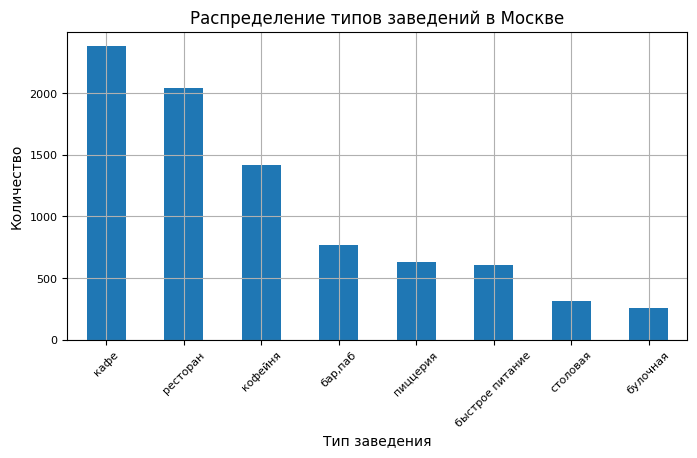

In [20]:
# Построим столбчатую диаграмму на основе полученных данных о количестве типов заведений
rest_join['category'].value_counts().plot(kind='bar', 
                                          grid=True, 
                                          figsize=(8, 4),
                                          fontsize=8,
                                          rot=45,
                                          title='Распределение типов заведений в Москве',
                                          xlabel='Тип заведения', 
                                          ylabel='Количество')

In [21]:
# Выведем все административные округа Москвы
rest_join['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Для удобства чтения информации удалим из строк словосочетание "административный округ", оставив только названия.

In [22]:
# Создадим функцию, оставляющую только названия округов
def editor_name(name):
    return name.split()[0]

In [23]:
# Применим функцию editor_name к столбцу district
rest_join['district'] = rest_join['district'].apply(editor_name)

<Axes: title={'center': 'Распределение заведений по округам Москвы'}, xlabel='Административный округ', ylabel='Количество заведений'>

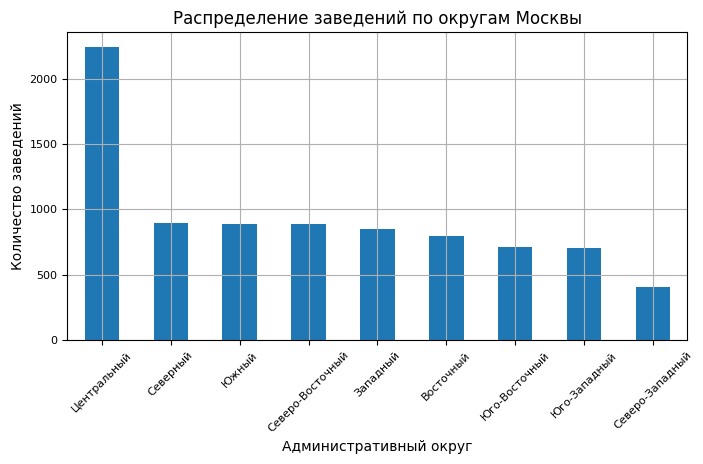

In [24]:
# Построим столбчатую диаграмму по количеству заведений в каждом округе Москвы
rest_join.groupby('district')['id'].count().sort_values(ascending=False).plot(kind='bar', 
                                                                             grid=True,
                                                                             figsize=(8, 4),
                                                                             fontsize=8,
                                                                             rot=45,
                                                                             title='Распределение заведений по округам Москвы',
                                                                             xlabel='Административный округ',
                                                                             ylabel='Количество заведений')

Ожидаемо в Центральном округе Москвы оказалось больше всего заведений общепита — около 1400. На втором месте Северный округ — чуть больше 400 точек. У Южного, Северно-Восточного и Западного округов примерно одинаковое число заведений — 400. Меньше всего точек общественного питания в Северо-Западном округе — всего 200.

<Axes: title={'center': 'Распределение типов заведений в Центральном округе'}, xlabel='Тип заведения', ylabel='Количество заведений'>

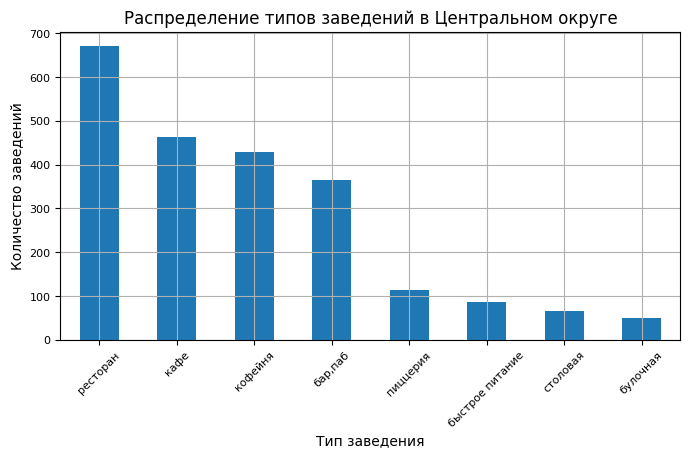

In [25]:
# С помощью столбчатой диаграммы узнаем, с какой частотой встречаются разные типы заведений в Центральном округе
rest_join[rest_join['district'] == 'Центральный']['category'].value_counts().plot(kind='bar',
                                                                                 grid=True,
                                                                                 figsize=(8, 4),
                                                                                 fontsize=8,
                                                                                 rot=45,
                                                                                 title='Распределение типов заведений в Центральном округе',
                                                                                 xlabel='Тип заведения',
                                                                                 ylabel='Количество заведений')

В Центральном округе по количеству заведений лидирует ресторан — более 425 точек. Почти одинаковое число заведений имеют бар, паб и кофейня — чуть больше 250. Кафе так же популярно и имеет около 225 заведений. У пиццерии меньше 100 точек, у быстрого питания — 50, у столовой меньше 50, а у булочной меньше 25.

In [26]:
# Посмотрим на распределение сетевых и несетевых заведений
rest_join['chain'].value_counts()

chain
0    5201
1    3205
Name: count, dtype: int64

Несетевых точек почти на 1000 больше, чем сетевых.

<Axes: title={'center': 'Доля сетевых и несетевых среди типов заведений'}, xlabel='Тип заведения', ylabel='Количество заведений'>

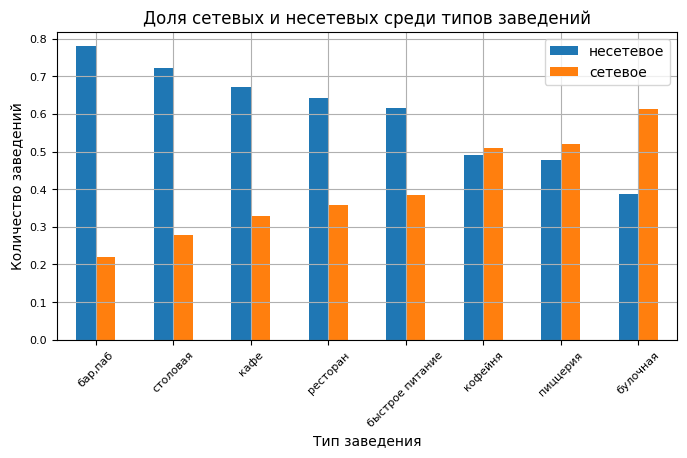

In [27]:
counts = rest_join.groupby(['category'])['chain'].value_counts()
new_dt = (
    counts.unstack(fill_value=0)  # Преобразуем в таблицу
    / rest_join['category'].value_counts()
)
counts_0 = pd.DataFrame(counts.unstack(fill_value=0)[0]/ rest_join['category'].value_counts())
counts_1 = pd.DataFrame(counts.unstack(fill_value=0)[1]/ rest_join['category'].value_counts())
counts_0 = counts_0.reset_index()
counts_0.columns = ['category', 'несетевое']
counts_1 = counts_1.reset_index()
counts_1.columns = ['category', 'сетевое']
counts_0.merge(counts_1, on='category').sort_values(by='несетевое', ascending=False).plot(kind='bar',
                                  x='category',
                                  grid=True,
                                  figsize=(8, 4),
                                  fontsize=8,
                                  rot=45,
                                  title='Доля сетевых и несетевых среди типов заведений',
                                  xlabel='Тип заведения',
                                  ylabel='Количество заведений')

Доля несетевых заведений преобладает у всех типов кроме булочной, кофейни и пиццерии. Самая большая доля несетевых у бара, паба, а самая низкая у булочной.

In [28]:
new_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, бар,паб to столовая
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                0 non-null      float64
 1   1                0 non-null      float64
 2   бар,паб          0 non-null      float64
 3   булочная         0 non-null      float64
 4   быстрое питание  0 non-null      float64
 5   кафе             0 non-null      float64
 6   кофейня          0 non-null      float64
 7   пиццерия         0 non-null      float64
 8   ресторан         0 non-null      float64
 9   столовая         0 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


Text(0.5, 0, 'Число мест')

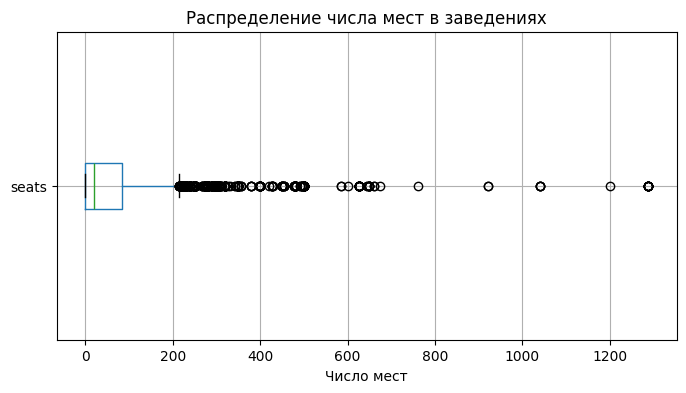

In [29]:
# Построим диаграмму размаха для проверки распределения числа мест в заведениях
plt.figure(figsize=(8, 4))

rest_join.boxplot(column='seats', vert=False)

plt.title('Распределение числа мест в заведениях')
plt.xlabel('Число мест') 

На диаграмме мы видим, что содержится большое количество выбросов, значения которых больше 200. Удалим эти значения из диаграммы, а так же значения-индикаторы -1.

Text(0.5, 0, 'Число мест')

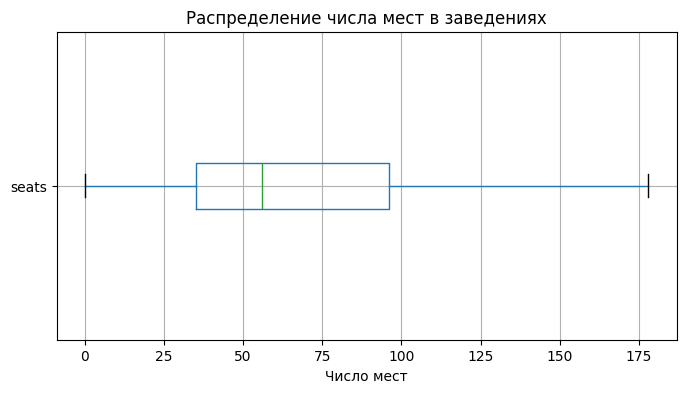

In [30]:
# Построим диаграмму размаха с отфильтрованными данными
plt.figure(figsize=(8, 4))

rest_join[(rest_join['seats'] >= 0) & (rest_join['seats'] < 180)].boxplot(column='seats', vert=False)

plt.title('Распределение числа мест в заведениях')
plt.xlabel('Число мест')

Теперь перед нами более правдоподобные значения числа мест — от нуля до 180.

In [31]:
# Узнаем точные значения медианы и остальных перцентилей
rest_join[(rest_join['seats'] >= 0) & (rest_join['seats'] < 180)]['seats'].describe()

count    3932.000000
mean       65.629959
std        42.862011
min         0.000000
25%        35.000000
50%        56.000000
75%        96.000000
max       178.000000
Name: seats, dtype: float64

Медиана составляет 60 мест, минимальное число мест равно нулю, а максимальное 178.

<Axes: title={'center': 'Медиана числа посадочных мест в заведениях'}, xlabel='Тип заведения', ylabel='Медиана числа мест'>

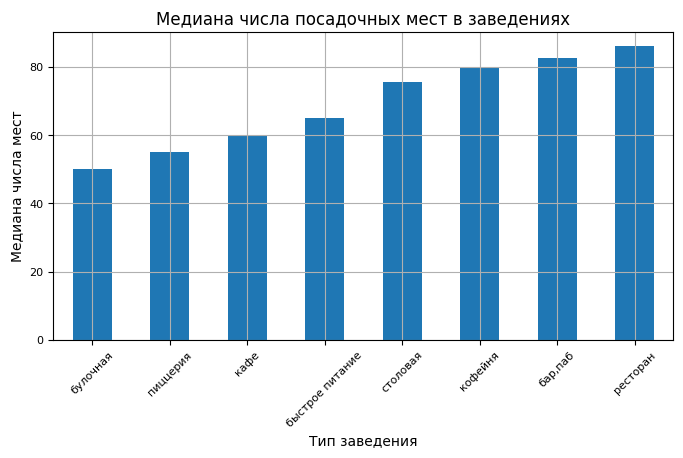

In [32]:
# Построим столбчатую диаграмму, чтобы узнать среднее число мест в каждом из заведений
rest_join[rest_join['seats'] >= 0].groupby('category')['seats'].median().sort_values(ascending=True).plot(kind='bar',
                                                  figsize=(8, 4),
                                                  fontsize=8,
                                                  grid=True,
                                                  rot=45,
                                                  title='Медиана числа посадочных мест в заведениях',
                                                  xlabel='Тип заведения',
                                                  ylabel='Медиана числа мест')

Меньше всего по медианному значению мест в булочной — 50, а больше всего в ресторане — более 85, что логично, так как булочные обычно меньше других заведений. Около 60 мест есть в пиццерии. В кофейне ровно 80 мест. В столовой более 70 мест, а в быстром питании менее 70. В кафе 60 посадочных мест. В баре, пабе медианное число мест чуть больше 80.

<Axes: title={'center': 'Средний рейтинг разных типов заведений'}, xlabel='Тип заведения', ylabel='Средний рейтинг'>

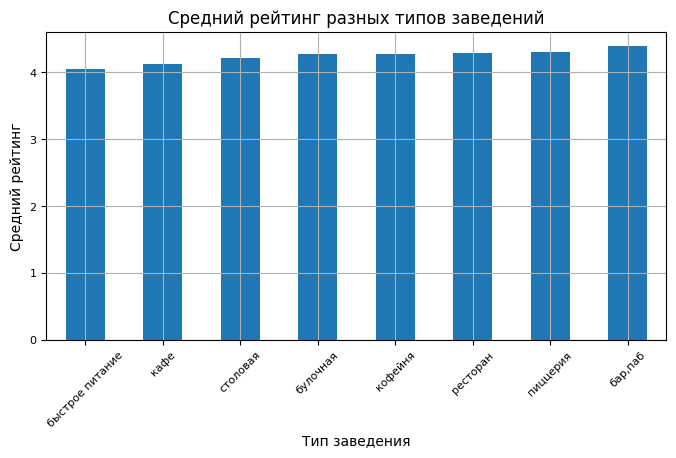

In [33]:
# Построим стобчатую диаграмму для сравнения среднего рейтинга заведений
rest_join.groupby('category')['rating'].mean().sort_values(ascending=True).plot(kind='bar',
                                                  figsize=(8, 4),
                                                  fontsize=8,
                                                  grid=True,
                                                  rot=45,
                                                  title='Средний рейтинг разных типов заведений',
                                                  xlabel='Тип заведения',
                                                  ylabel='Средний рейтинг')

Рейтинг всех категорий заведений выше четырёх и меньше пяти, что говорит о высоком уровне сервиса. Ниже всех средний рейтинг у быстрого питания, а выше всех у бара, паба, которые обходят даже ресторан.

In [34]:
rest_join['price']

0          Не указано
1       выше среднего
2             средние
3          Не указано
4             средние
            ...      
8401       Не указано
8402       Не указано
8403       Не указано
8404       Не указано
8405       Не указано
Name: price, Length: 8406, dtype: object

In [35]:
# Построим матрицу корреляции и узнаем, какие переменные зависимы друг от друга
correlation_matrix = rest_join[['rating', 'district', 'category', 'chain', 'seats', 'price']].phik_matrix()
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating,district,category,chain,seats,price
rating,1.000000,0.189389,0.198949,0.119071,0.000000,0.310534
district,0.189389,1.000000,0.174326,0.064233,0.276330,0.203078
category,0.198949,0.174326,1.000000,0.265627,0.059447,0.329543
chain,0.119071,0.064233,0.265627,1.000000,0.055175,0.088850
seats,0.000000,0.276330,0.059447,0.055175,1.000000,0.045134
price,0.310534,0.203078,0.329543,0.088850,0.045134,1.000000


Сильной зависимости не наблюдается ни у одной из переменных. Слабая зависимость, возможно, присутствует между рейтингом и ценой (0.31).

In [36]:
# Проверим корреляцию и выведем для каждой ценовой категории средний и медианный рейтинг.
rest_join.groupby('price')['rating'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

,mean,median
price,,
высокие,4.436611,4.4
выше среднего,4.386347,4.4
средние,4.297874,4.3
низкие,4.173077,4.2
Не указано,4.166627,4.3


По полученным результатам среднего и медианы рейтинга заведений зависимость действительно наблюдается — чем выше цены в заведении, тем выше его рейтинг.

In [37]:
# Найдём топ-15 популярных сетевых заведений в Москве
rest_join[rest_join['chain'] == 1].groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'}).sort_values(by='id', ascending=False).head(15)

,,id,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286487
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114285
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


<Axes: title={'center': 'Топ-15 сетевых заведений по количеству точек'}, xlabel='Название заведения', ylabel='Количество точек'>

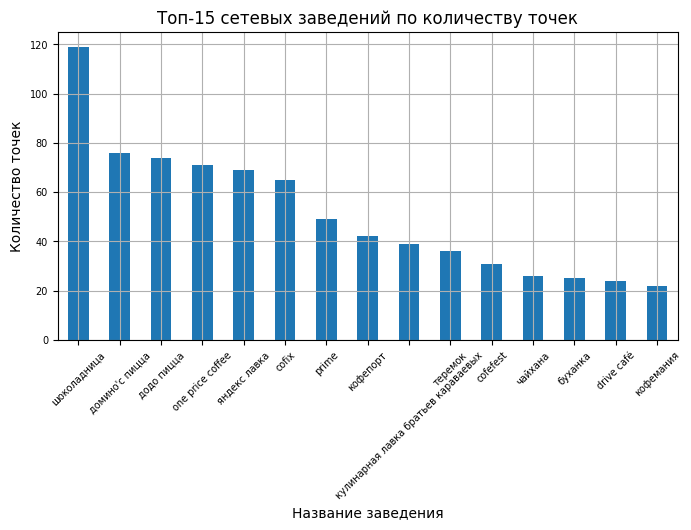

In [38]:
# Построим столбчатую диаграмму топ-15 популярных сетевых заведений общепита Москвы
rest_join[rest_join['chain'] == 1].groupby(['name', 'category'])['id'].count().sort_values(ascending=False).reset_index().head(15).plot(kind='bar',
                                                                                                              x='name',
                                                                                                              y='id',
                                                                                                              legend=False,
                                                                                                              grid=True,
                                                                                                              figsize=(8, 4),
                                                                                                              fontsize=7,
                                                                                                              rot=45,
                                                                                                              title='Топ-15 сетевых заведений по количеству точек',
                                                                                                              xlabel='Название заведения',
                                                                                                              ylabel='Количество точек')

Самой большой сетью в Москве является кофейня "Шоколадница" — 74 точки. За ней идут пиццерии "Додо пицца" и "Домино'с пицца" с 72 и 71 точками соответственно. Кофейня "Cofix", расположившаяся на четвёртом месте, имеет 35 точек. Замыкают топ-15 сразу три сети с 12 заведениями: "Бургер кинг", "Хинкальная" и "Алло! Пицца".

<Axes: title={'center': 'Средний рейтинг для топ-15 сетевых заведений по количеству точек'}, xlabel='Название заведения', ylabel='Средний рейтинг'>

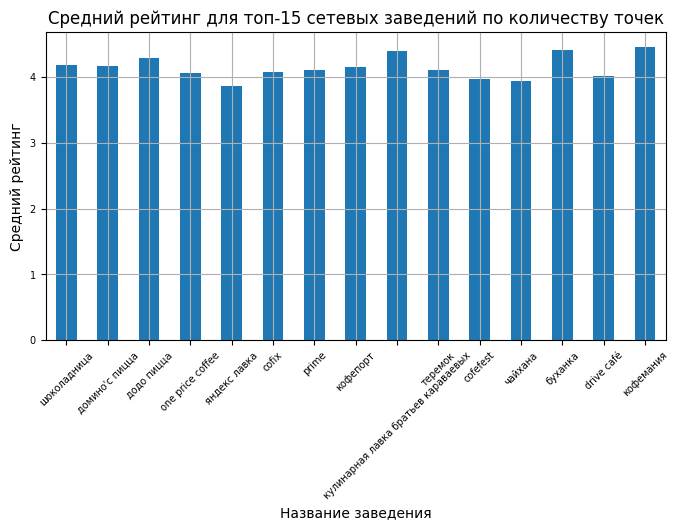

In [39]:
# Построим столбчатую диаграмму топ-15 популярных сетевых заведений общепита Москвы
rest_join[rest_join['chain'] == 1].groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'}).sort_values(by='id', ascending=False).head(15).reset_index().head(15).plot(kind='bar',
                                                                                                              x='name',
                                                                                                              y='rating',
                                                                                                              legend=False,
                                                                                                              grid=True,
                                                                                                              figsize=(8, 4),
                                                                                                              fontsize=7,
                                                                                                              rot=45,
                                                                                                              title='Средний рейтинг для топ-15 сетевых заведений по количеству точек',
                                                                                                              xlabel='Название заведения',
                                                                                                              ylabel='Средний рейтинг')

Самый высокий средний рейтинг у "Кофемании", несмотря на то что она занимает только 15 место по количеству точек, затем идёт "Буханка" и после неё "Теремок". Наименьший рейтинг, менее четырёх, у "Яндекс Лавки" и "Чайханы".

<Axes: title={'center': 'Средний чек заведений в разных округах'}, xlabel='Округ Москвы', ylabel='Средний чек'>

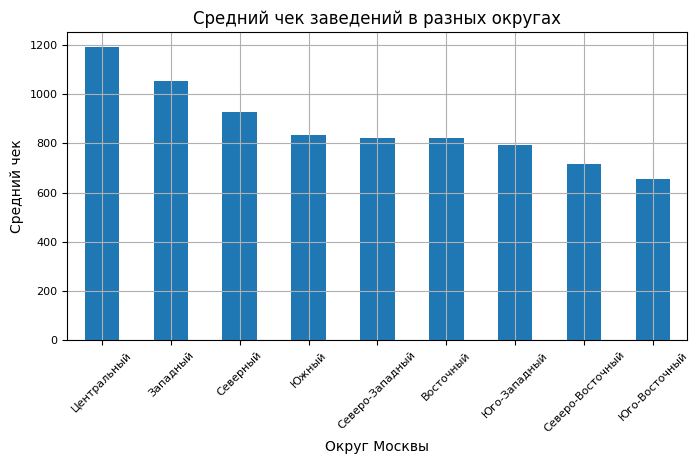

In [40]:
# Построим столбчатую диаграмму для определения среднего чека в разных округах Москвы
rest_join.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                         grid=True,
                                                                                         figsize=(8, 4),
                                                                                         fontsize=8,
                                                                                         rot=45,
                                                                                         title='Средний чек заведений в разных округах',
                                                                                         xlabel='Округ Москвы',
                                                                                         ylabel='Средний чек')

В Центральном районе Москвы, как и ожидалось, самый высокий средний чек. В любом другом районе средний чек будет ниже. В Юго-Восточном он почти в 2 раза ниже, чем в Центральном (в этом районе самый маленький средний чек). В Южном, Северо-Западном и Восточном районах средний чек примерно на одном уровне — чуть выше 800 рублей. Ближе всех к Центральному району по среднему чеку оказался Западный, а следом за ним идёт Северный. В Юго-Западном районе средний чек около 800, а в следующем за ним Северо-Восточном чуть больше 700 (он идёт предпоследним районом по среднему чеку).

<Axes: title={'center': 'Распределение уровня цен'}, xlabel='Район Москвы', ylabel='Количество'>

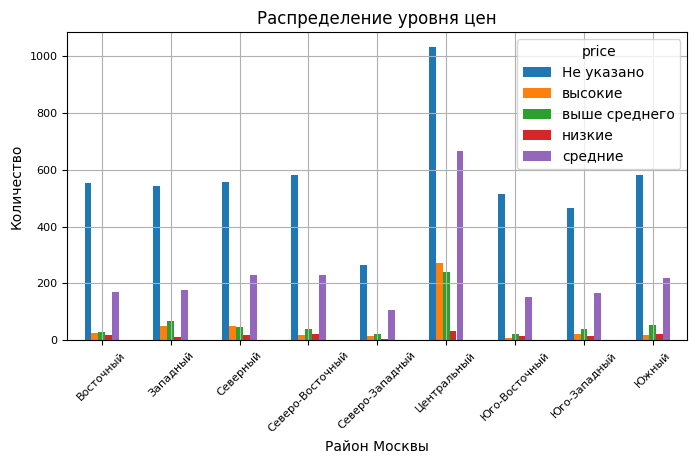

In [41]:
rest_join.groupby('district')['price'].value_counts().unstack(fill_value=0).plot(kind='bar',
                                                                                figsize=(8, 4),
                                                                                grid=True,
                                                                                fontsize=8,
                                                                                rot=45,
                                                                                title='Распределение уровня цен',
                                                                                              xlabel='Район Москвы',
                                                                                              ylabel='Количество')

С большим отрывом от других районов по среднему уровню цен лидирует Центральный — он указан для более чем 650 заведений. "Высокие" и "Выше среднего" так же преобладают в Центральном районе. Примерно одинаково средние цены распределились в Северном, Северно-Восточном и Южном районах — более 200. Меньше всего заведений с высокими ценами найдено в Юго-Восточном округе, а со средними в Северо-Западном. Второе место после Центрального по количеству заведений с ценами выше среднего занимают Западный район, затем Южный.

### Итоговый вывод и рекомендации

По итогам работы два датафрейма объединили в один, преобразовали типы данных некоторых столбцов для уменьшения занимаемого объёма, обработали пропуски и проверили наличие дубликатов, добавили новый столбец, создали 12 визуализаций.

Рекомендации: так как компания только пробует себя в новом направлении, то не стоит открывать заведение в округе, где много конкурентов или слишком мало заведений — это округа Центральный и Северо-Западный. Меньше всего в Москве булочных, поэтому можно открыть именно её. Это влечёт небольшие расходы по сравнению с другими типами заведений и здесь выше вероятность быстрее найти своего потребителя из-за небольшого числа аналогичных заведений. Булочная может быть как сетевой, так и несетевой в зависимости от ресурсов компании. Оптимальным числом посадочных мест будет являться 50. В Западном, Северном и Южном средний чек будет выше, чем в других округах кроме Центрального, поэтому можно выбрать один из этих округов. Также стоит обратить внимание на качество и цены в заведении, ведь чем выше цена, тем выше рейтинг, поэтому нужно сконцентрироваться не на экономии ресурсов, а на качестве продукции, которое будет учтено в цене, а затем и в рейтинге.